In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

df = pd.read_pickle('treino.pkl.gz')

In [2]:
plt.rcParams['figure.figsize'] = (20, 8)

In [3]:
# não faz parte do protocolo, varia de acordo com a variável
# transformação da variável 'nascimento' em 'idade'(quantitativa)

def year_to_age(x):
    if x == '00':
        return 20
    else:
        return (100 - int(x)) + 20

df['nascimento'] = df['nascimento'].str[6:].apply(lambda x: year_to_age(x))
df = df.rename(columns = {'nascimento': 'idade'})

In [4]:
# as funções funcionam para quebra em 4 categorias

In [5]:
# 1.a - discretização (árvore de decisão, para obter limiares)
def tree_thresholds(dataframe, series_name, target):
    mdl = DecisionTreeClassifier(random_state = 42, max_depth = 2)
    mdl.fit(dataframe[[series_name]], dataframe[[target]])

    fig = plt.figure(figsize = (15, 10))
    _ = tree.plot_tree(mdl)

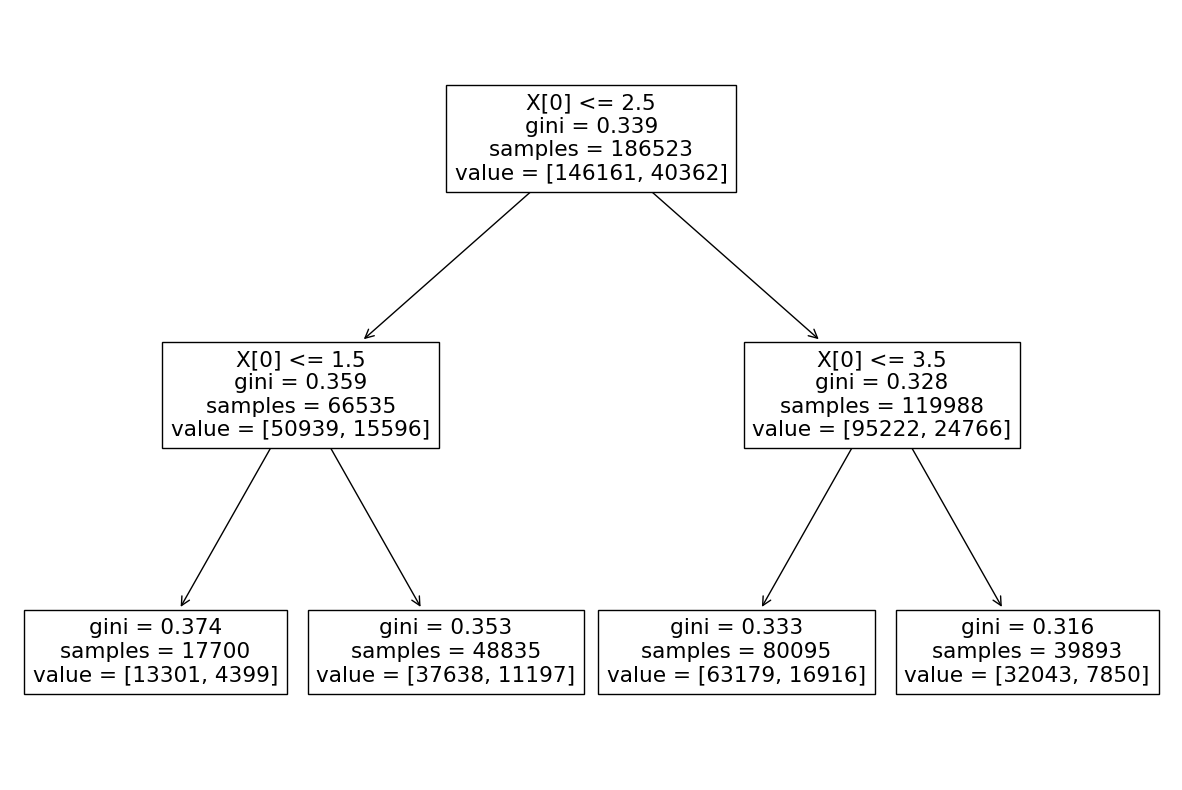

In [11]:
plt.style.use('default')
tree_thresholds(df, 'idade', 'default')

In [7]:
# 1.b - discretização (alocando dados sob categorias, de acordo com limiares)

# parâmtero zero: no caso de score, por exemplo, existe grande proporção de 0s, neste caso, para que 
# estes não influenciem o modelo, categorizamos como 0
def four_split_discretization(x, t1, t2, t3, zero = False):
    
    if zero == True:
        i = 0
    else: 
        i = 1
    
    if x <= t1:
        return i
    elif x > t1 and x <= t2:
        return i + 1
    elif x > t2 and x <= t3:
        return i + 2
    elif x > t3:
        return i + 3
    
df['idade'] = df['idade'].apply(lambda x: four_split_discretization(x, 24.5, 30.5, 44.5, False))

In [8]:
plt.style.use('dark_background')

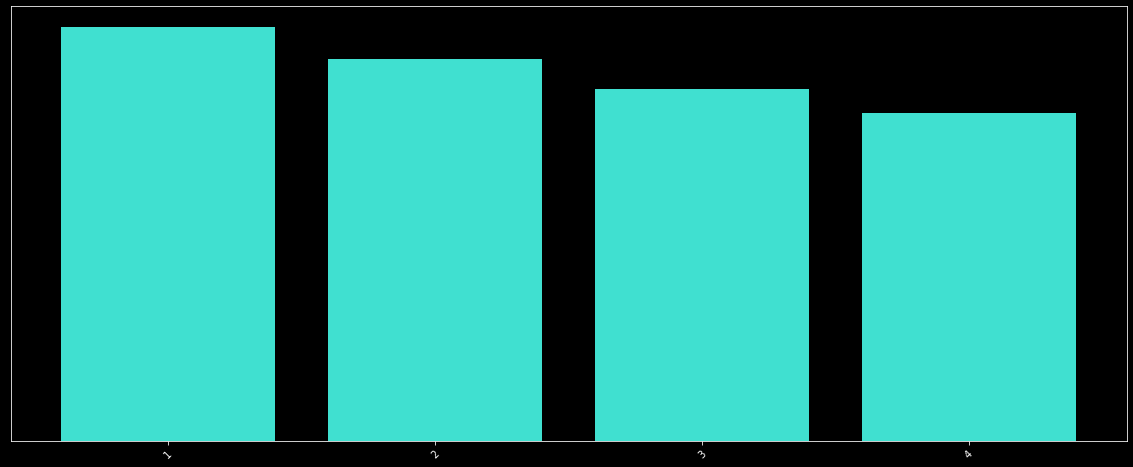

In [9]:
# conclusão: a variável 'ordena' o default ?
def target_prop_bin(dataframe, series_name, target):
    
    plot_data = []
    for i in dataframe[series_name].unique():
        data = dataframe.loc[dataframe[series_name] == i, target].value_counts(1)
        if len(data) == 2:
            plot_data.append([str(i), data.iloc[1]])
        if len(data) < 2:
            plot_data.append([str(i), data.iloc[0]])
            

    plot_data.sort()
    for i in plot_data:
        plt.bar(i[0], i[1], color = 'turquoise')
        
    plt.xticks(range(len(plot_data)), [i[0] for i in plot_data])
    plt.xticks(rotation = 45)
    plt.yticks([])
    plt.show()
    
target_prop_bin(df, 'idade', 'default')

In [10]:
# devemos nos preocupar com o 'tamanho' de cada categoria ? 
df['idade'].value_counts(1)

3    0.429411
2    0.261818
4    0.213877
1    0.094894
Name: idade, dtype: float64